<a href="https://colab.research.google.com/github/TahaBerk58/python/blob/main/projects/Data%20Analysis/Mobile_Device_Usage_and_User_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Device Usage and User Behavior Analysis

### Loading Libraries
- `pandas`, `numpy`, `matplotlib`, `seaborn`: Essential libraries for data analysis and visualization.
- `warnings`: Used to suppress warnings.
- `sklearn`: Contains tools for data preprocessing, modeling, and evaluation.

### Loading and Exploring the Dataset
1. **Data Loading**: User behavior data is loaded from the `user_behavior_dataset.csv` file using `pd.read_csv`.
2. **Data Information**: `df.info()` displays data types, columns, and information on missing values.
3. **Missing Values**: `df.isnull().sum()` shows the number of missing values in each column.
4. **Viewing First Rows**: The first 15 rows of the dataset are examined with `df.head(15)`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df=pd.read_csv("/content/drive/MyDrive/Yazılım/Colab Notebooks/Python/Data Analysis/Mobile Device Usage and User Behavior Analysis/user_behavior_dataset.csv")
print(df.info())
print(df.isnull().sum())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
User ID                       0
Device Model                  0
Operating System      



---


# Univariate Analysis

### Application Usage Duration Distribution Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Histogram and KDE Plot**: The distribution of application usage time is plotted using `sns.histplot()` with 30 bins and a density curve (`kde=True`).
- **Plot Title and Labels**: Title, x-axis, and y-axis labels were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

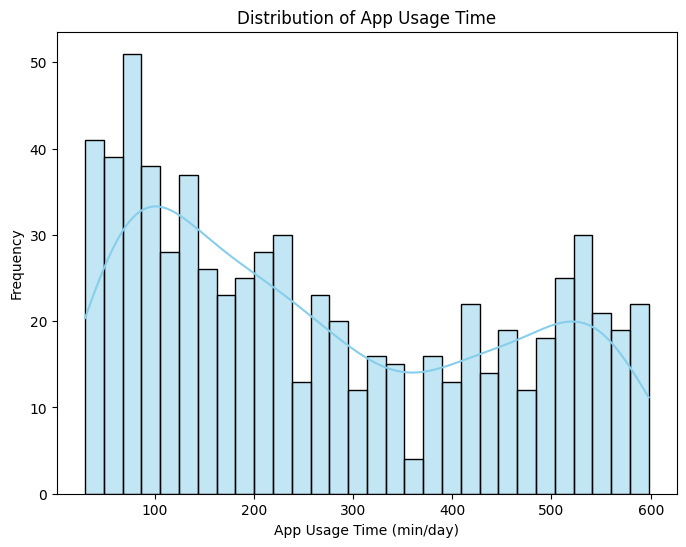

In [2]:
plt.figure(figsize=(8, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of App Usage Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.show()

### Screen On Time Distribution Boxplot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Boxplot**: The `sns.boxplot()` function was used to visualize the distribution of screen on time. The color `lightgreen` was selected.
- **Plot Title and Labels**: A title and x-axis label were added. The y-axis label was not added as it only shows frequency.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

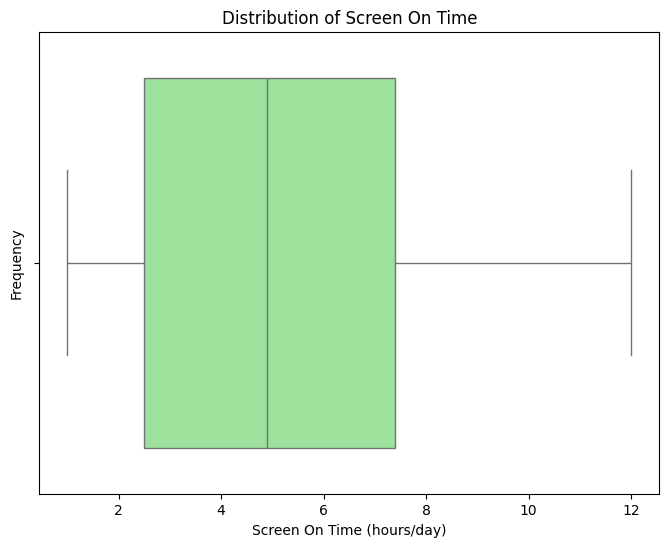

In [3]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Screen On Time (hours/day)'], color='lightgreen')
plt.title('Distribution of Screen On Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Frequency')
plt.show()

### Battery Drain Distribution Density Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Density Plot (KDE)**: The battery drain density plot is created using `sns.kdeplot()`, with the area shaded using `shade=True` and the color `salmon`.
- **Plot Title and Labels**: A title, x-axis label (`Battery Drain (mAh/day)`), and y-axis label (`Density`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

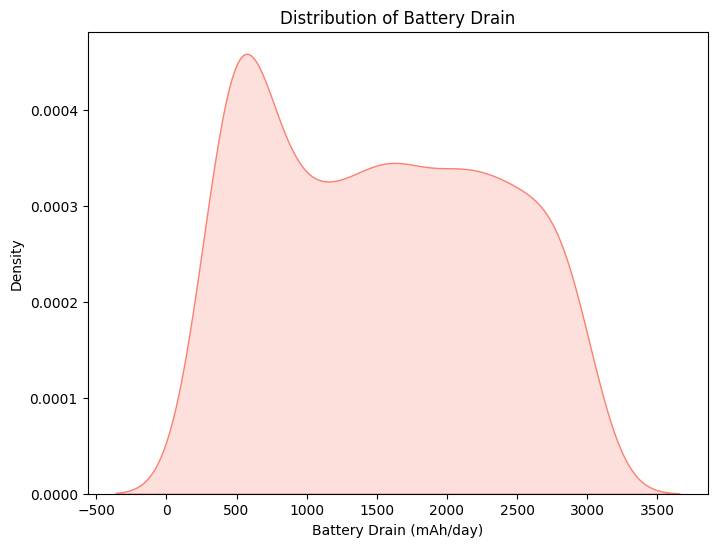

In [4]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Battery Drain (mAh/day)'], shade=True, color='salmon')
plt.title('Distribution of Battery Drain')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Density')
plt.show()

### Distribution Plot of Number of Apps Installed
- **Plot Size**: The plot size is set to 22x10 inches using `plt.figure(figsize=(22, 10))`.
- **Count Plot**: The frequency of different values in the "Number of Apps Installed" column of the dataset is visualized using `sns.countplot()`. The color palette is set to `'viridis'`.
- **Plot Title and Labels**: A title, x-axis label (`Number of Apps Installed`), and y-axis label (`Frequency`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

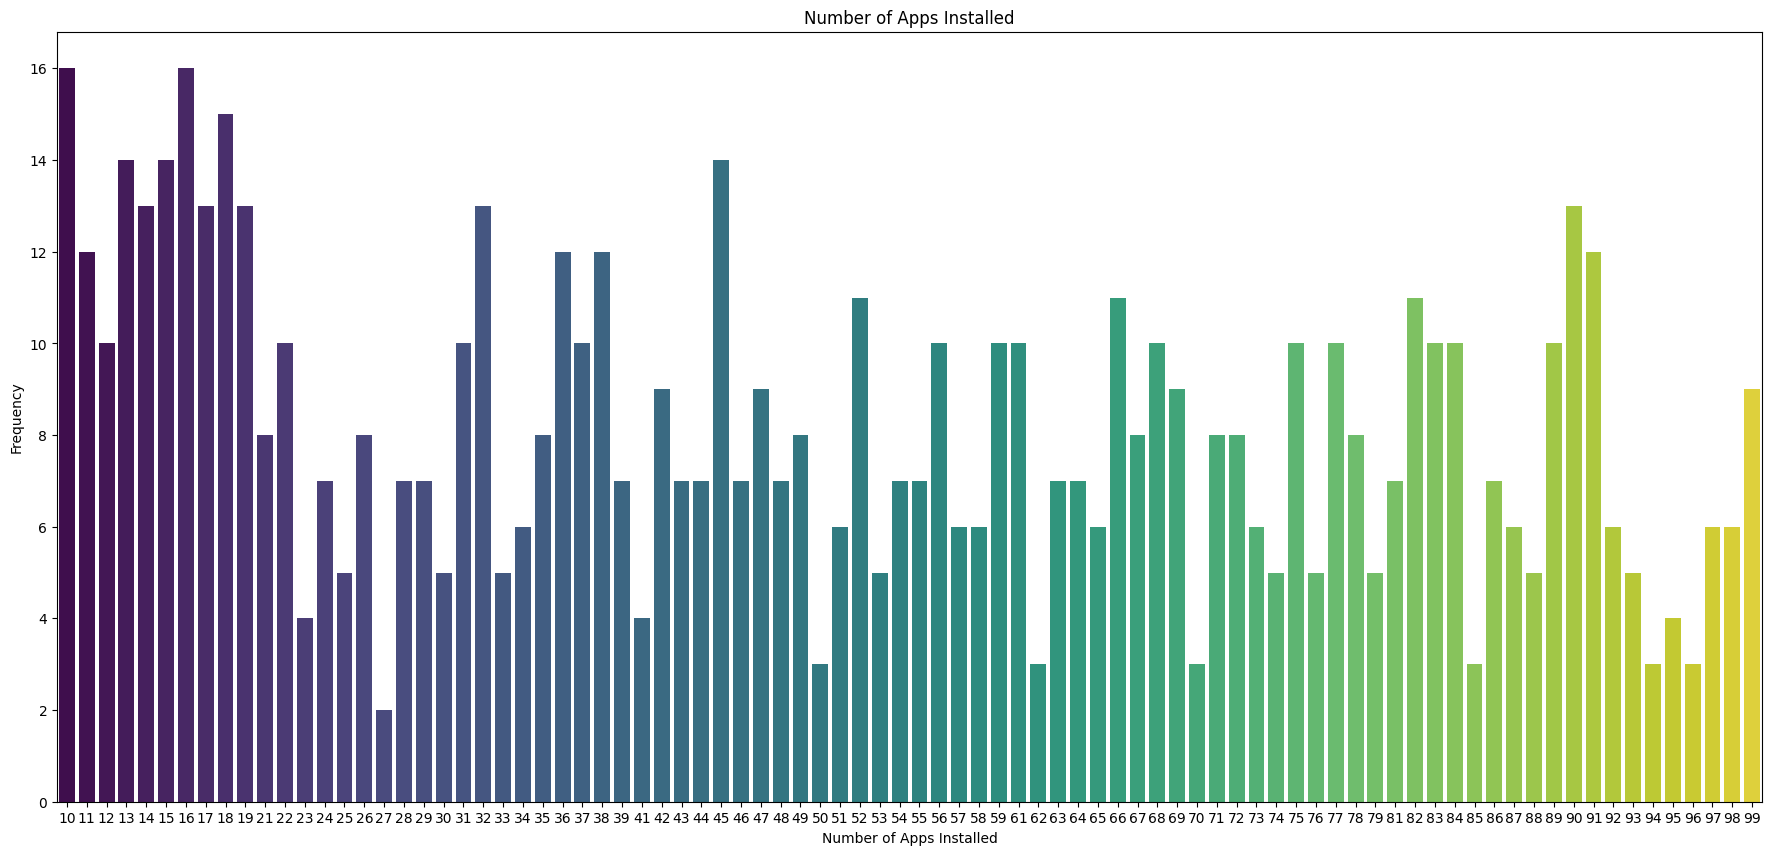

In [23]:
plt.figure(figsize=(22, 10))
sns.countplot(x='Number of Apps Installed', data=df, palette='viridis')
plt.title('Number of Apps Installed')
plt.xlabel('Number of Apps Installed')
plt.ylabel('Frequency')
plt.show()

### Data Usage Distribution Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Histogram and KDE Plot**: The distribution of data usage is plotted using `sns.histplot()` with 30 bins and a density curve (`kde=True`). The color `orchid` was used.
- **Plot Title and Labels**: A title, x-axis label (`Data Usage (MB/day)`), and y-axis label (`Frequency`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

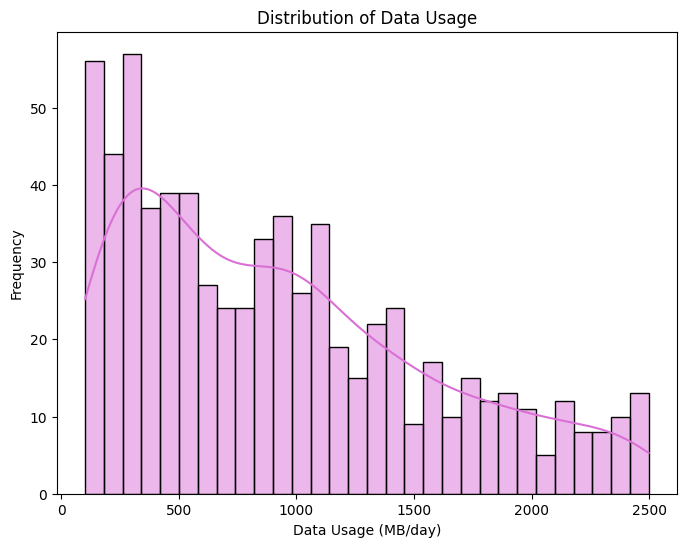

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Data Usage (MB/day)'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Data Usage')
plt.xlabel('Data Usage (MB/day)')
plt.ylabel('Frequency')
plt.show()

### Age Distribution Boxplot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Boxplot**: The distribution of age data is visualized using `sns.boxplot()`. The color `orange` was selected.
- **Plot Title and Labels**: A title and x-axis label (`Age`) were added. The y-axis label was not added as it only shows frequency.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

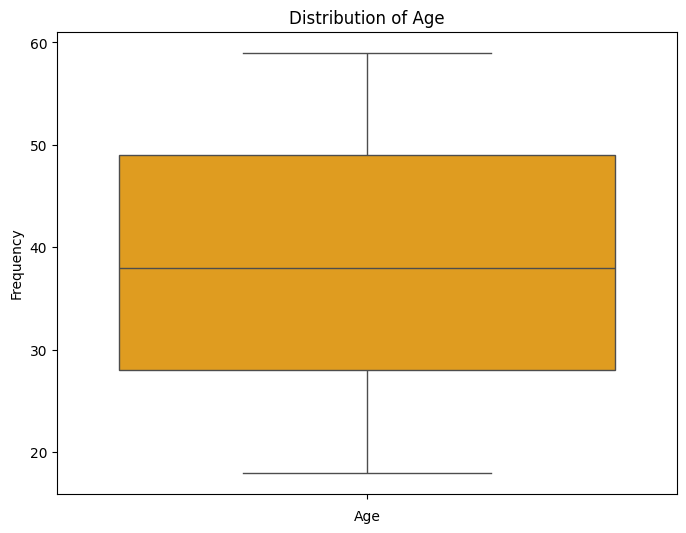

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['Age'], color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### User Count by Device Model
- **Plot Size**: The plot size is set to 10x6 inches using `plt.figure(figsize=(10, 6))`.
- **Count Plot**: User counts by device model are visualized horizontally using `sns.countplot()`. The device models are ordered by frequency with `order=df['Device Model'].value_counts().index`, and the color palette `'coolwarm'` was selected.
- **Plot Title and Labels**: A title, x-axis label (`Count`), and y-axis label (`Device Model`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

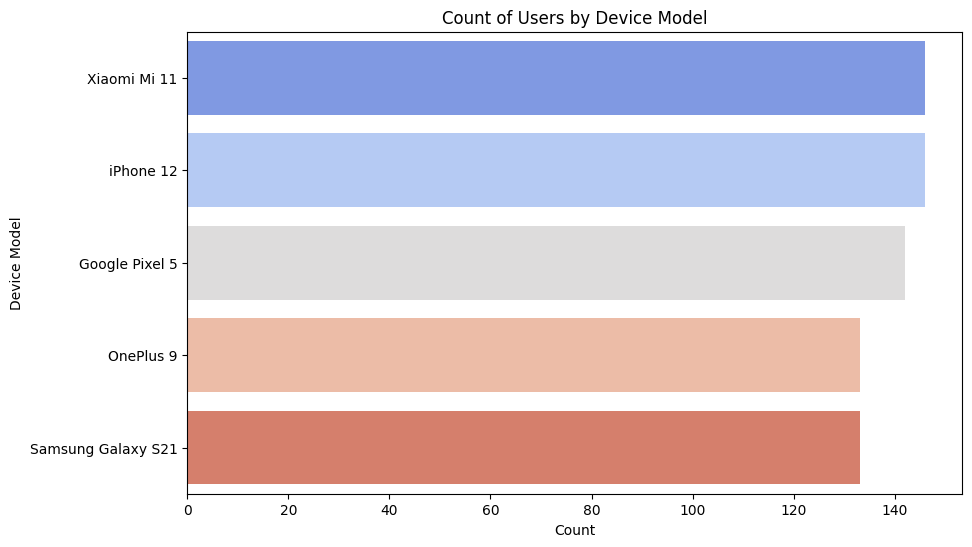

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Device Model', data=df, order=df['Device Model'].value_counts().index, palette='coolwarm')
plt.title('Count of Users by Device Model')
plt.xlabel('Count')
plt.ylabel('Device Model')
plt.show()

### Operating System Distribution Plot
- **Plot Size**: The plot size is set to 6x4 inches using `plt.figure(figsize=(6, 4))`.
- **Count Plot**: The distribution of operating systems is visualized using `sns.countplot()`. The color palette `'Set2'` was selected.
- **Plot Title and Labels**: A title, x-axis label (`Operating System`), and y-axis label (`Count`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

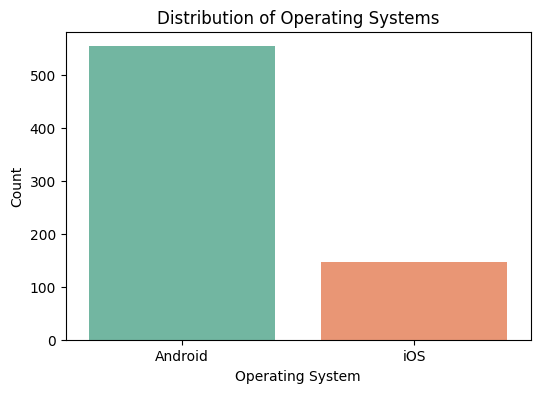

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Operating System', data=df, palette='Set2')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

### Gender Distribution Plot
- **Plot Size**: The plot size is set to 6x4 inches using `plt.figure(figsize=(6, 4))`.
- **Count Plot**: The gender distribution is visualized using `sns.countplot()`. The color palette `'pastel'` was selected.
- **Plot Title and Labels**: A title, x-axis label (`Gender`), and y-axis label (`Count`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

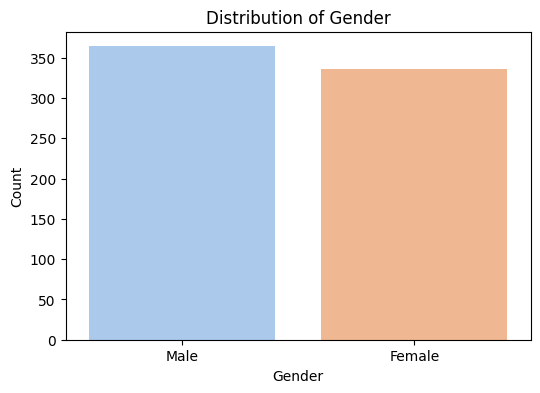

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


---

# Bivariate Analysis

### Comparison of App Usage Time and Screen On Time
- **Cleaning Spaces in Data Columns**: Spaces at the beginning and end of column names are removed using `df.columns.str.strip()`.
- **Plot Size**: The plot size is set to 10x7 inches using `plt.figure(figsize=(10, 7))`.
- **Scatter Plot**: The relationship between app usage time and screen on time is visualized using `sns.scatterplot()`. The `hue='User Behavior Class'` argument separates the data by user behavior class, with the `'viridis'` color palette used and `alpha=0.7` for transparency.
- **Plot Title and Labels**: A title, x-axis label (`App Usage Time (min/day)`), and y-axis label (`Screen On Time (hours/day)`) were added.
- **Annotations**: User behavior class annotations are added using `plt.legend(title='User Behavior Class')`.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

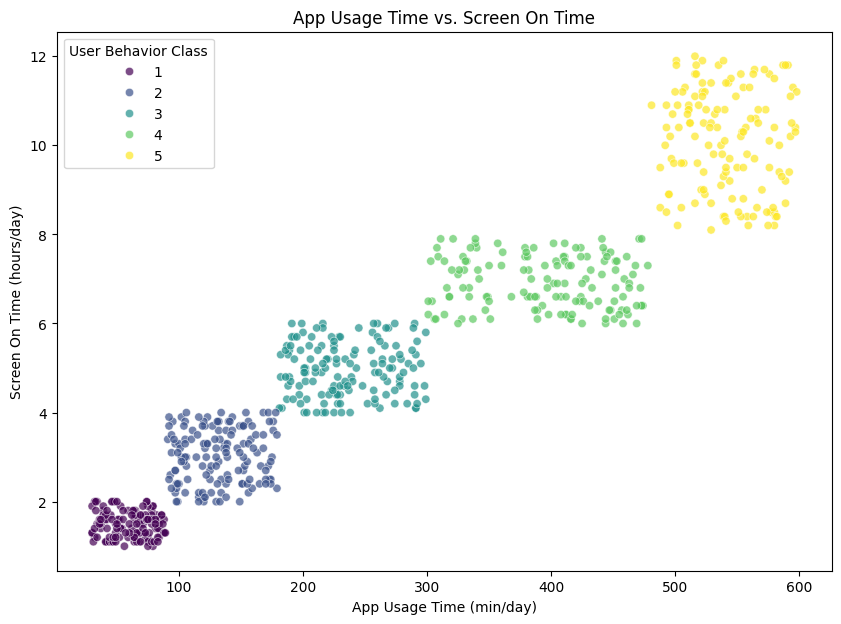

In [11]:
df.columns = df.columns.str.strip()
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df,
    x='App Usage Time (min/day)',
    y='Screen On Time (hours/day)',
    hue='User Behavior Class',
    palette='viridis',
    alpha=0.7
)
plt.title('App Usage Time vs. Screen On Time')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Screen On Time (hours/day)')
plt.legend(title='User Behavior Class')
plt.show()

### Comparison of Battery Drain and Data Usage
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Scatter Plot**: The relationship between battery drain and data usage is visualized using `sns.scatterplot()`. The `hue='User Behavior Class'` argument separates the data by user behavior class, with the `'magma'` color palette used and `alpha=0.7` for transparency.
- **Plot Title and Labels**: A title, x-axis label (`Battery Drain (mAh/day)`), and y-axis label (`Data Usage (MB/day)`) were added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

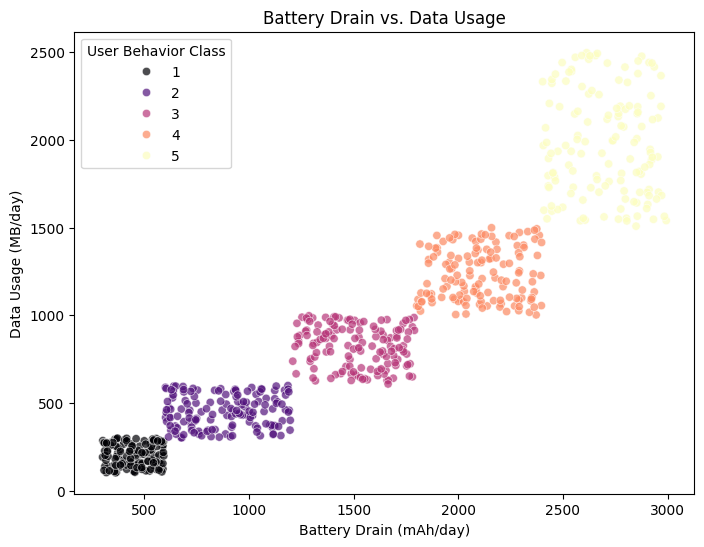

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Battery Drain (mAh/day)',
    y='Data Usage (MB/day)',
    hue='User Behavior Class',
    palette='magma',
    alpha=0.7
)
plt.title('Battery Drain vs. Data Usage')
plt.xlabel('Battery Drain (mAh/day)')
plt.ylabel('Data Usage (MB/day)')
plt.show()

### Relationship Between Number of Apps Installed and App Usage Time
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Regression Plot**: A regression plot is created using `sns.regplot()` to visualize the relationship between the number of apps installed (`x='Number of Apps Installed'`) and app usage time (`y='App Usage Time (min/day)'`).
  - `scatter_kws={'alpha':0.5}` adds transparency to the scatter points.
  - `line_kws={'color':'red'}` sets the regression line color to red.
- **Plot Title and Labels**: A title (`Number of Apps Installed vs. App Usage Time`), x-axis label (`Number of Apps Installed`), and y-axis label (`App Usage Time (min/day)`) are added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

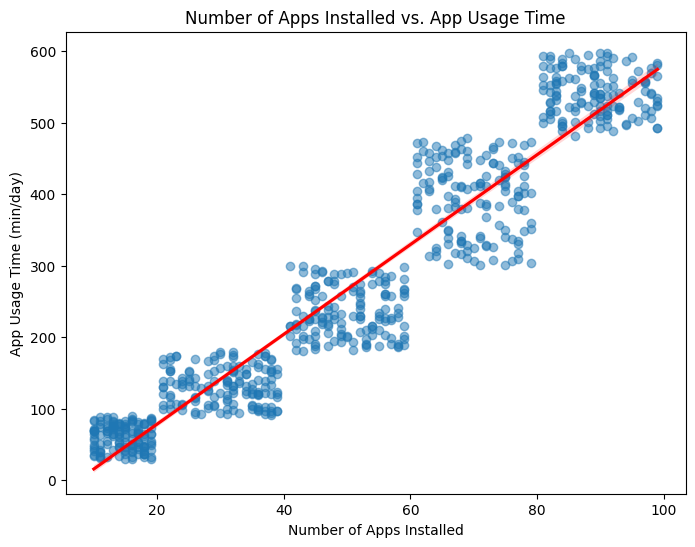

In [13]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Number of Apps Installed', y='App Usage Time (min/day)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Number of Apps Installed vs. App Usage Time')
plt.xlabel('Number of Apps Installed')
plt.ylabel('App Usage Time (min/day)')
plt.show()

### Age vs. Data Usage by Operating System
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Scatter Plot**: A scatter plot is created using `sns.scatterplot()` to visualize the relationship between age (`x='Age'`) and data usage (`y='Data Usage (MB/day)'`).
  - The `hue='Operating System'` argument differentiates points by the operating system.
  - The `palette='Set1'` argument sets the color palette, and `alpha=0.8` adjusts point transparency.
- **Plot Title and Labels**: A title (`Age vs. Data Usage`), x-axis label (`Age`), and y-axis label (`Data Usage (MB/day)`) are added.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

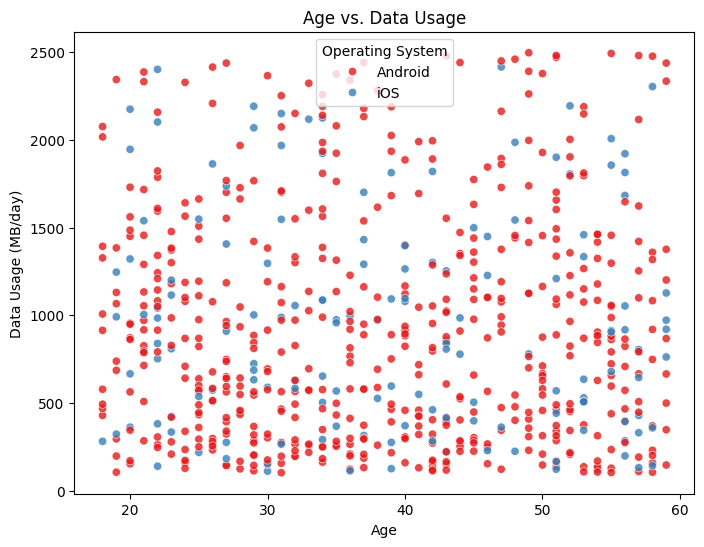

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Data Usage (MB/day)', hue='Operating System', palette='Set1', alpha=0.8)
plt.title('Age vs. Data Usage')
plt.xlabel('Age')
plt.ylabel('Data Usage (MB/day)')
plt.show()

### Operating System vs. Data Usage Box Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Box Plot**: The distribution of daily data usage is visualized using `sns.boxplot()`, with the x-axis representing the operating system and the y-axis representing data usage in MB/day. The color palette `'Set1'` was selected.
- **Plot Title and Labels**: A title, `'Operating System vs. Data Usage'`, was added along with x-axis label (`Operating System`) and y-axis label (`Data Usage`).
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

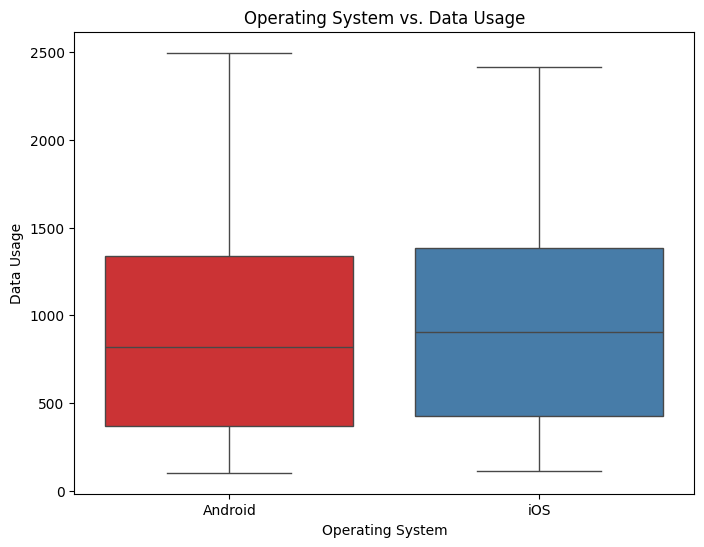

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Operating System', y='Data Usage (MB/day)', data=df, palette='Set1')
plt.title('Operating System vs. Data Usage')
plt.xlabel('Operating System')
plt.ylabel('Data Usage')
plt.show()

### Battery Drain by Gender Violin Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Violin Plot**: The distribution of battery drain is visualized using `sns.violinplot()`, with the x-axis representing gender and the y-axis representing battery drain in mAh/day. The color palette `'Pastel2'` was selected for a softer appearance.
- **Plot Title and Labels**: A title, `'Battery Drain by Gender'`, was added along with x-axis label (`Gender`) and y-axis label (`Battery Drain (mAh/day)`).
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

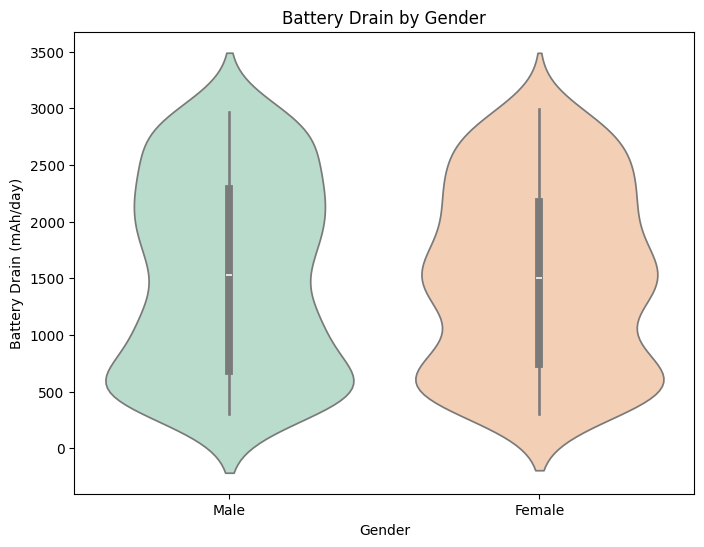

In [17]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Gender', y='Battery Drain (mAh/day)', palette='Pastel2')
plt.title('Battery Drain by Gender')
plt.xlabel('Gender')
plt.ylabel('Battery Drain (mAh/day)')
plt.show()

### Data Usage by User Behavior Class Box Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Box Plot**: The distribution of data usage is visualized using `sns.boxplot()`, with the x-axis representing user behavior class and the y-axis representing data usage in MB/day. The color palette `'Pastel1'` was chosen for a light and pleasant appearance.
- **Plot Title and Labels**: A title, `'Data Usage by User Behavior Class'`, was added along with x-axis label (`User Behavior Class`) and y-axis label (`Data Usage (MB/day)`).
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

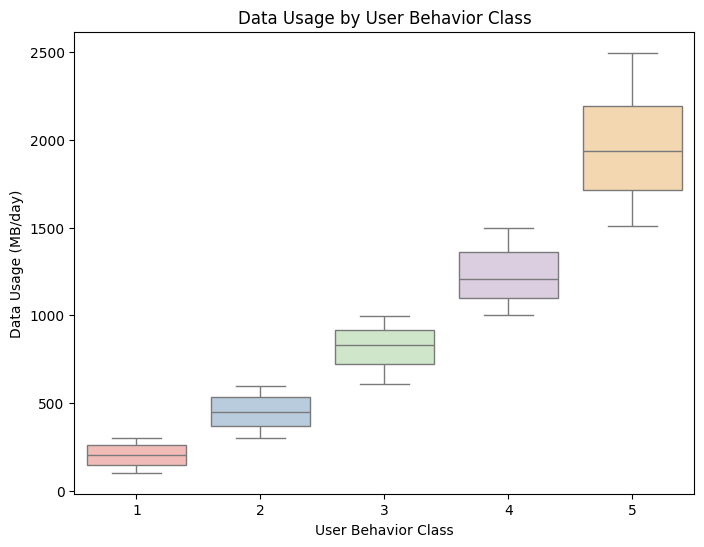

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='User Behavior Class', y='Data Usage (MB/day)', palette='Pastel1')
plt.title('Data Usage by User Behavior Class')
plt.xlabel('User Behavior Class')
plt.ylabel('Data Usage (MB/day)')
plt.show()

### Screen On Time by Gender Bar Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Bar Plot**: The average screen on time is visualized using `sns.barplot()`, with the x-axis representing gender and the y-axis representing screen on time in hours/day. The color palette `'Set2'` was selected for a vibrant look, and confidence intervals are disabled with `ci=None`.
- **Plot Title and Labels**: A title, `'Screen On Time by Gender'`, was added along with x-axis label (`Gender`) and y-axis label (`Screen On Time (hours/day)`).
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

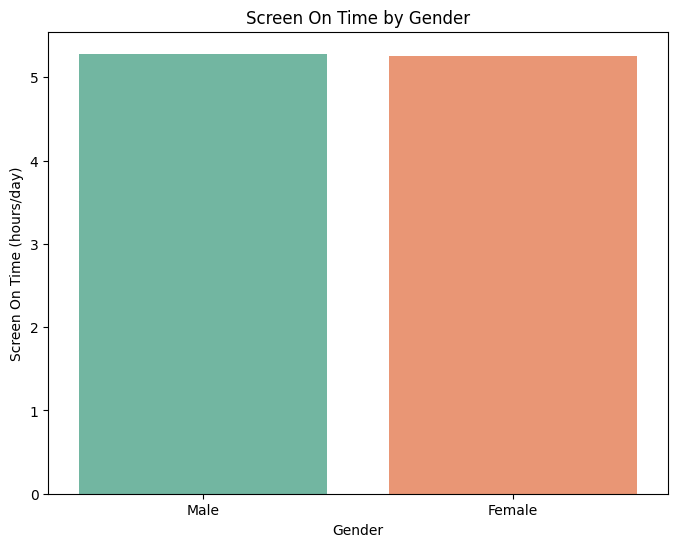

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Screen On Time (hours/day)', palette='Set2', ci=None)
plt.title('Screen On Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Screen On Time (hours/day)')
plt.show()

### User Behavior Class by Operating System Count Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Count Plot**: The distribution of user behavior classes is visualized using `sns.countplot()`, with the x-axis representing user behavior class and the count of occurrences on the y-axis. The color palette `'Pastel1'` was chosen for a soft appearance, and the `hue` parameter is used to differentiate by operating system.
- **Plot Title and Labels**: A title, `'User Behavior Class by Operating System'`, was added along with x-axis label (`User Behavior Class`) and y-axis label (`Count`).
- **Legend**: A legend is included with the title `'Operating System'` to clarify the color coding for different operating systems.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

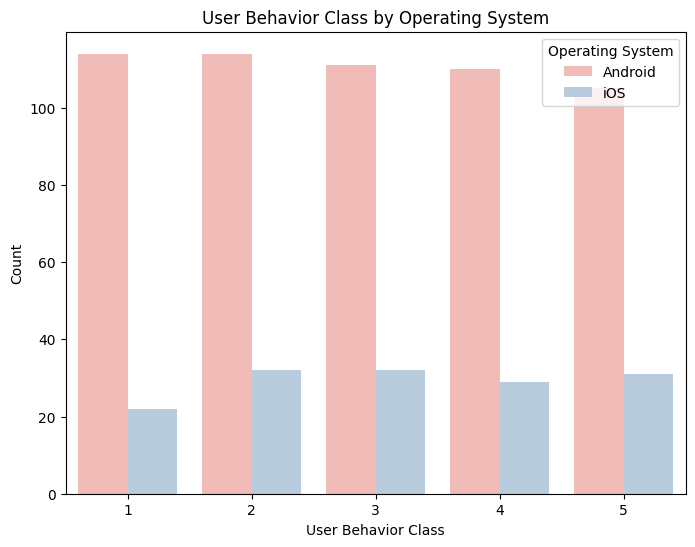

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='User Behavior Class', palette='Pastel1', hue='Operating System')
plt.title('User Behavior Class by Operating System')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

### User Behavior Class by Gender Count Plot
- **Plot Size**: The plot size is set to 8x6 inches using `plt.figure(figsize=(8, 6))`.
- **Count Plot**: The distribution of user behavior classes is visualized using `sns.countplot()`, with the x-axis representing user behavior class and the count of occurrences on the y-axis. The `hue` parameter is used to differentiate the counts by gender, and the color palette `'Pastel2'` was selected for a soft and appealing look.
- **Plot Title and Labels**: A title, `'User Behavior Class by Gender'`, was added along with x-axis label (`User Behavior Class`) and y-axis label (`Count`).
- **Legend**: A legend is included with the title `'Gender'` to clarify the color coding for different genders.
- **Visualization**: The plot is displayed on the screen using `plt.show()`.

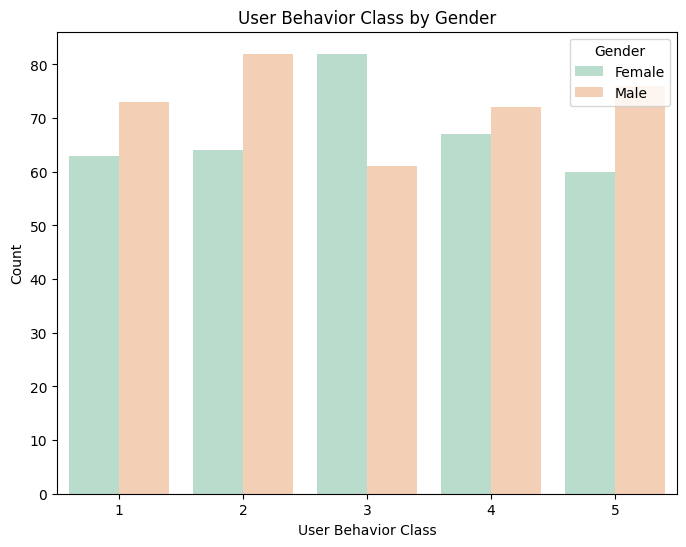

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='Pastel2')
plt.title('User Behavior Class by Gender')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

---

# Multivariate Analysis